# Entrega 4 - Redes Neuronales

### Grupo 50:
    - M. Ramilo (5.665.788-5)
    - G. Dinello (5.031.022-5)
    - F. Crocamo (4.732.816-6)

## 1. Problema

El problema se centra en la clasificación de imágenes del conjunto de datos Fashion-MNIST en 10 categorías diferentes de artículos de vestimenta de Zalando. Cada imagen está en escala de grises y tiene un tamaño de 28x28 píxeles. Se busca desarrollar un clasificador de imágenes que pueda identificar con precisión la categoría a la que pertenece el artículo de cada imagen.

## 2. Objetivo

El objetivo principal del trabajo es construir y evaluar modelos de aprendizaje automático basados en redes neuronales para abordar el problema de clasificación en el conjunto de datos Fashion-MNIST, mejorar su rendimiento a través de técnicas de regularización y evaluar su capacidad para identificar categorías de ropa en un conjunto de evaluación. Se busca lograr un alto nivel de precisión y generalización en la clasificación de imágenes de ropa. El objetivo se desglosa en varias etapas:

1. Clasificador Base
2. Entrenamiento y Evaluación
3. Arquitecturas Adicionales
4. Regularización
5. Evaluación en el Conjunto de Evaluación
6. Identificación de Instancias Difíciles

## 3. Implementación

Importamos las librerias necesarias para el desarrollo del trabajo.

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import SGD, Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from models import FeedForwardNN

plt.style.use('ggplot')

La implementación de la red neuronal feedforward base se encuentra en el archivo `models.py` y se puede ver a continuación:

```python
class FeedForwardNN(nn.Module):
    def __init__(
        self, hl_amount=1, hl_size=32, f_activation=nn.Sigmoid(), dropout_prob=0
    ):
        super(FeedForwardNN, self).__init__()
        self.input_layer = nn.Linear(28 * 28, hl_size)
        self.activation = f_activation
        self.dropout = nn.Dropout(
            dropout_prob
        )  # Capa Dropout con la tasa de Dropout especificada
        for i in range(hl_amount - 1):
            setattr(self, f"hidden_layer_{i}", nn.Linear(hl_size, hl_size))
        self.output_layer = nn.Linear(hl_size, 10)
        self.hl_amount = hl_amount

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.input_layer(x)
        x = self.activation(x)
        for i in range(self.hl_amount - 1):
            x = getattr(self, f"hidden_layer_{i}")(x)
            x = self.activation(x)
            x = self.dropout(x)  # Aplicar Dropout después de cada capa oculta
        x = self.output_layer(x)
        return x
```

Se define una clase llamada `FeedForwardNN` que representa la red neuronal feedforward con la capacidad de personalizar el número de capas ocultas, el tamaño de las capas ocultas, la función de activación y la aplicación de dropout. A continuación se detalla el código de la clase:

##### **1. Definición de la Clase:**
    
La clase `FeedForwardNN` se define como una subclase de `nn.Module`, que es la clase base para todos los modelos de PyTorch.

##### **2. Constructor (`__init__`):**

En el constructor de la clase, se pueden especificar varios parámetros para configurar la arquitectura de la red:

* `hl_amount` (cantidad de capas ocultas): Controla cuántas capas ocultas tendrá la red. De manera predeterminada, hay una capa oculta.
* `hl_size` (tamaño de las capas ocultas): Controla el número de unidades en cada capa oculta. De manera predeterminada, cada capa oculta tiene 32 unidades.
* `f_activation` (función de activación): Controla la función de activación utilizada en las capas ocultas. De manera predeterminada, se utiliza la función sigmoide (nn.Sigmoid()).
* `dropout_prob` (probabilidad de dropout): Controla la probabilidad de desactivación de las unidades durante el entrenamiento. Por defecto, no se aplica dropout (valor 0).

En el constructor se definen los siguientes atributos:

* `input_layer`: Capa de entrada de la red, que es una capa lineal que toma como entrada un vector de 784 elementos (el valor de cada uno de los pixeles de las imagenes de 28 * 28) y devuelve un vector con `hl_size` elementos, que sirven como entrada para la próxima capa.
* `activation`: Función de activación que se aplica a la salida de cada capa oculta.
* `dropout`: Capa de dropout que desactiva aleatoriamente las unidades durante el entrenamiento para evitar el sobreajuste segun la probabilidad de dropout especificada (`dropout_prob`).

* Se utiliza un bucle `for` para definir las capas ocultas adicionales según la cantidad especificada en `hl_amount`.

* `output_layer`: La capa de salida con 10 unidades, que corresponde a las 10 categorías de Fashion-MNIST.

##### **3. Metodo `forward`:**

El método `forward` define cómo se propagan los datos a través de la red durante la inferencia. Realiza las siguientes acciones:

* Aplana la entrada (x) para que sea compatible con la capa de entrada.
* Pasa los datos a través de la capa de entrada y la función de activación.
* Se repite el proceso para cada capa oculta, incluyendo la función de activación y dropout.
* Finalmente, los datos se pasan a la capa de salida, que produce las salidas de la red.

Descargamos el conjunto de entrenamiento, aplicándole transformaciones para facilitar el manejo de los datos, y separamos el conjunto en 2 subconjuntos: entrenamiento y evaluacion.

In [2]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=4, shuffle=False)

In [4]:
for i in range(10):
    print(
        f"Porcentaje de {class_labels[i]} en train_dataset: {100 * sum(train_dataset.targets == i) / len(train_dataset.targets):.2f}%"
    )

for i in range(10):
    print(
        f"Porcentaje de {class_labels[i]} en test_dataset: {100 * sum(test_dataset.targets == i) / len(test_dataset.targets):.2f}%"
    )

Porcentaje de T-shirt/top en train_dataset: 10.00%
Porcentaje de Trouser en train_dataset: 10.00%
Porcentaje de Pullover en train_dataset: 10.00%
Porcentaje de Dress en train_dataset: 10.00%
Porcentaje de Coat en train_dataset: 10.00%
Porcentaje de Sandal en train_dataset: 10.00%
Porcentaje de Shirt en train_dataset: 10.00%
Porcentaje de Sneaker en train_dataset: 10.00%
Porcentaje de Bag en train_dataset: 10.00%
Porcentaje de Ankle boot en train_dataset: 10.00%
Porcentaje de T-shirt/top en test_dataset: 10.00%
Porcentaje de Trouser en test_dataset: 10.00%
Porcentaje de Pullover en test_dataset: 10.00%
Porcentaje de Dress en test_dataset: 10.00%
Porcentaje de Coat en test_dataset: 10.00%
Porcentaje de Sandal en test_dataset: 10.00%
Porcentaje de Shirt en test_dataset: 10.00%
Porcentaje de Sneaker en test_dataset: 10.00%
Porcentaje de Bag en test_dataset: 10.00%
Porcentaje de Ankle boot en test_dataset: 10.00%


Vemos que el conjunto de validacion respeta la distribucion de clases del conjunto de entrenamiento.

In [3]:
from main import run_model

Utilizamos `nn.CrossEntropyLoss` como función de perdida para medir las predicciones del modelo

In [4]:
LEARNING_RATE = 0.01
EPOCHS = 10

loss_fn = nn.CrossEntropyLoss()

Corremos el modelo entrenandolo por 10 épocas utilizando descenso por gradiente estocástico

In [10]:
ff_model = FeedForwardNN()
ff_optimizer = SGD(ff_model.parameters(), lr=LEARNING_RATE)

train_loss_history, test_loss_history, test_accuracy_history = \
    run_model(ff_model, ff_optimizer, loss_fn, train_loader, test_loader, EPOCHS)

Epoca nr: 0
Perdida promedio en entrenamiento: 0.6909981369972229
Perdida promedio en testeo: 0.5137844085693359
Precision promedio en testeo: 0.8226
Epoca nr: 1
Perdida promedio en entrenamiento: 0.44732439517974854
Perdida promedio en testeo: 0.45921674370765686
Precision promedio en testeo: 0.8377
Epoca nr: 2
Perdida promedio en entrenamiento: 0.40476080775260925
Perdida promedio en testeo: 0.4271984398365021
Precision promedio en testeo: 0.8466
Epoca nr: 3
Perdida promedio en entrenamiento: 0.3819591701030731
Perdida promedio en testeo: 0.4202476441860199
Precision promedio en testeo: 0.8462
Epoca nr: 4
Perdida promedio en entrenamiento: 0.36509281396865845
Perdida promedio en testeo: 0.4063880741596222
Precision promedio en testeo: 0.8515
Epoca nr: 5
Perdida promedio en entrenamiento: 0.3533187806606293
Perdida promedio en testeo: 0.39172330498695374
Precision promedio en testeo: 0.8586
Epoca nr: 6
Perdida promedio en entrenamiento: 0.34276559948921204
Perdida promedio en testeo: 

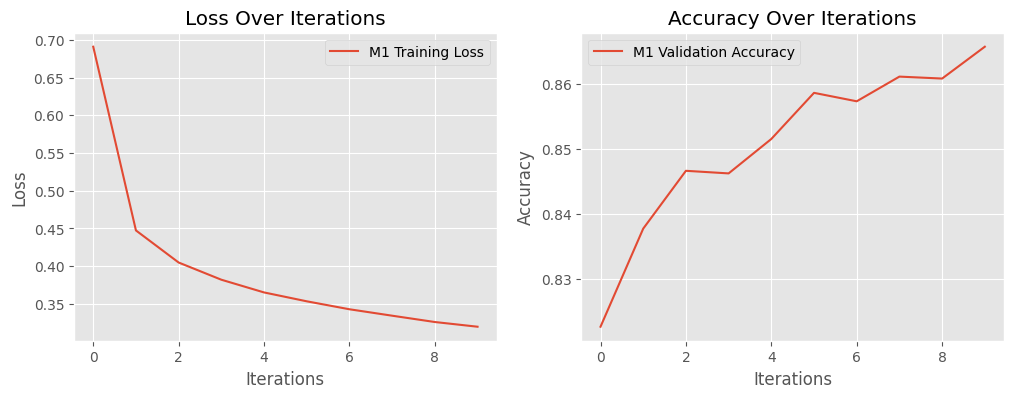

In [23]:
from main import plot_loss_precision

plot_loss_precision([train_loss_history], [test_accuracy_history])

Se puede observar que el modelo con tan solo 1 epoca de entrenamiento ya realiza predicciones con una precisión de 82%, lo que mejora hasta 86% luego de las proximas iteraciones.

### Arquitecturas adicionales

Se pueden modificar ciertos parámetros del modelo con el fin de generar modelos con arquitecturas distintas a la utilizada anteriormente

In [5]:
from main import plot_loss_precision, plot_loss_comparation

In [82]:
model1 = FeedForwardNN(hl_amount=1, hl_size=64, f_activation=nn.ReLU())
model2 = FeedForwardNN(hl_amount=2, hl_size=64, f_activation=nn.Tanh())
model3 = FeedForwardNN(hl_amount=1, hl_size=128, f_activation=nn.ReLU())

##### Modelo 1:

* `hl_amount=1` (1 capa oculta): En este modelo, se ha optado por una sola capa oculta para mantener una arquitectura simple y ver cómo un aumento en el tamaño de las unidades afecta al rendimiento.
* `hl_size=64` (64 unidades en la capa oculta): Se ha incrementado el número de unidades en la capa oculta a 64, el doble de lo utilizado anteriormente.
* `f_activation=nn.ReLU()` (Función de activación ReLU): Se ha elegido ReLU como función de activación, ya que es una función que ha demostrado buen rendimiento en muchas aplicaciones.

Esperamos que este modelo tenga un buen rendimiento con una arquitectura relativamente simple. El aumento en el tamaño de las unidades podría mejorar la capacidad de representación.

##### Modelo 2:

* `hl_amount=2` (2 capas ocultas): En este modelo, se han agregado dos capas ocultas para explorar una arquitectura más profunda y ver cómo afecta al rendimiento.
* `hl_size=64` (64 unidades en cada capa oculta): Se ha mantenido el tamaño de las unidades en 64.
* `f_activation=nn.Tanh()` (Función de activación Tangente Hiperbolica): Se ha elegido la función de activación Tangente Hiperbólica (Tanh) para introducir no linealidades diferentes en comparación con el primer modelo.

Con dos capas ocultas y funciones de activación diferentes, esperamos que este modelo pueda capturar relaciones más complejas en los datos.

##### Modelo 3:

* `hl_amount=1` (1 capa ocultas): Similar al Modelo 1, se ha optado por una sola capa oculta, pero con más unidades.
* `hl_size=128` (128 unidades en la capa oculta): Se ha incrementado significativamente el número de unidades en la capa oculta para evaluar cómo un aumento en la capacidad de representación afecta al rendimiento.
* `f_activation=nn.ReLU()` (Función de activación ReLU): Al igual que en el Modelo 1, se ha elegido ReLU como función de activación debido a su eficacia en problemas de clasificación.

Con una capa oculta grande, esperamos que este modelo pueda aprender representaciones más sofisticadas de los datos. La arquitectura más grande puede ayudar a capturar características más profundas en las imágenes.

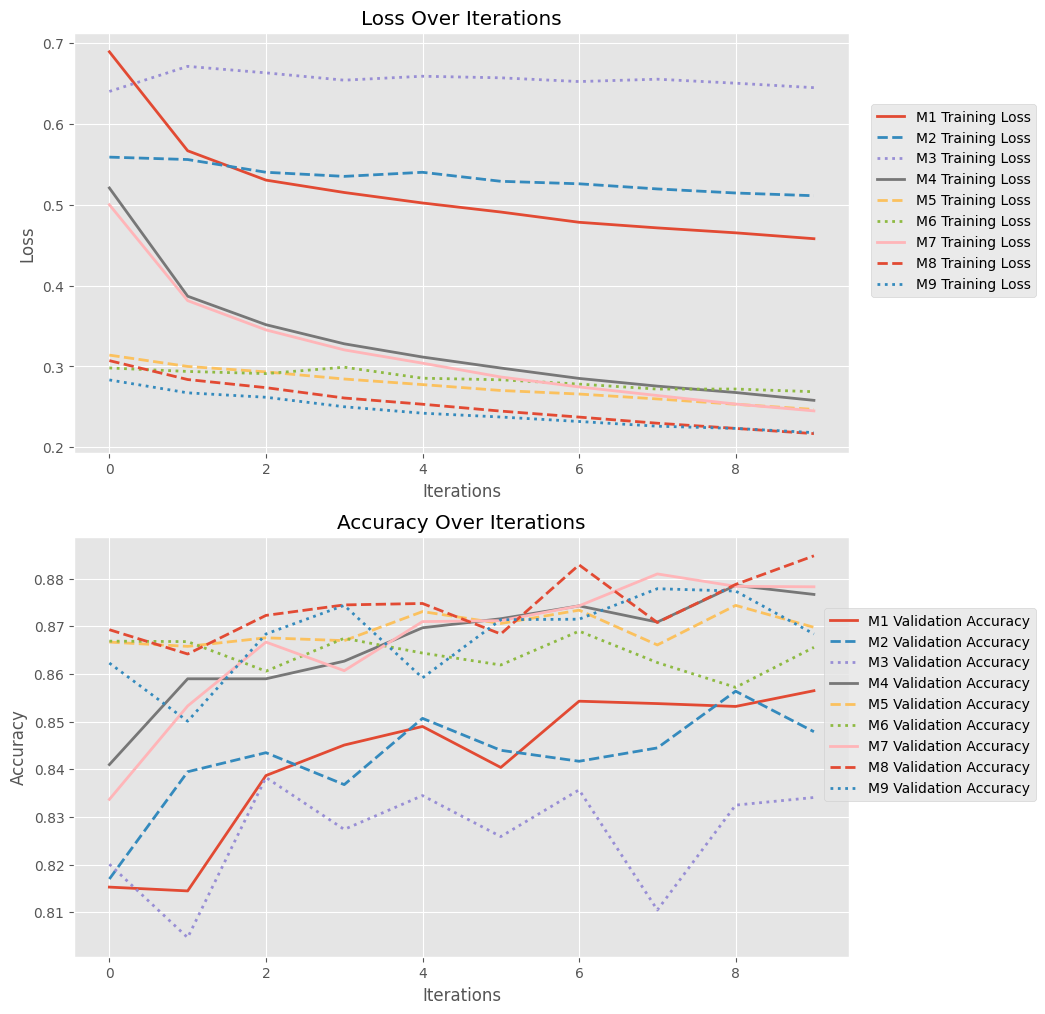

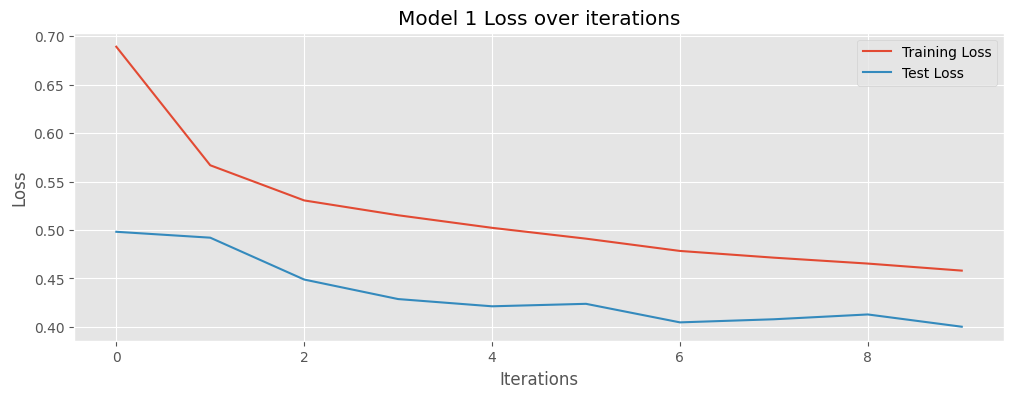

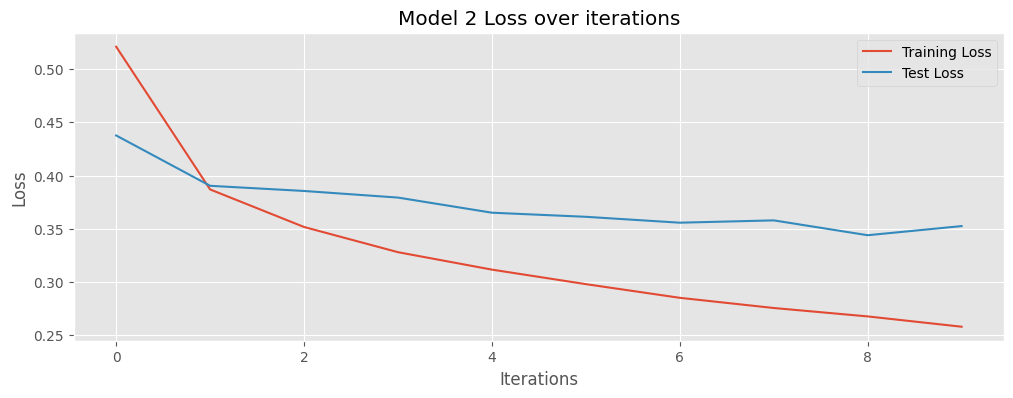

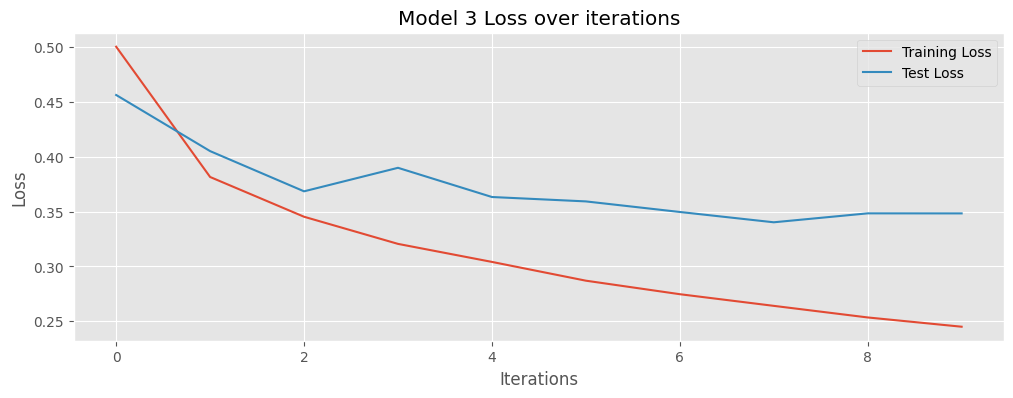

In [77]:
optimizer11 = SGD(model1.parameters(), lr=LEARNING_RATE)
optimizer12 = SGD(model1.parameters(), lr=0.02)
optimizer13 = SGD(model1.parameters(), lr=0.03)

optimizer21 = SGD(model2.parameters(), lr=LEARNING_RATE)
optimizer22 = SGD(model2.parameters(), lr=0.02)
optimizer23 = SGD(model2.parameters(), lr=0.03)

optimizer31 = SGD(model3.parameters(), lr=LEARNING_RATE)
optimizer32 = SGD(model3.parameters(), lr=0.02)
optimizer33 = SGD(model3.parameters(), lr=0.03)

run_model_partial = lambda model, optimizer: run_model(
    model, optimizer, loss_fn, train_loader, test_loader)

m11_trlh, m11_telh, m11_teah = run_model_partial(model1, optimizer11)
m12_trlh, m12_telh, m12_teah = run_model_partial(model1, optimizer12)
m13_trlh, m13_telh, m13_teah = run_model_partial(model1, optimizer13)

m21_trlh, m21_telh, m21_teah = run_model_partial(model2, optimizer21)
m22_trlh, m22_telh, m22_teah = run_model_partial(model2, optimizer22)
m23_trlh, m23_telh, m23_teah = run_model_partial(model2, optimizer23)

m31_trlh, m31_telh, m31_teah = run_model_partial(model3, optimizer31)
m32_trlh, m32_telh, m32_teah = run_model_partial(model3, optimizer32)
m33_trlh, m33_telh, m33_teah = run_model_partial(model3, optimizer33)

# Graficos de perdida y precision
plot_loss_precision(
    [
        m11_trlh,
        m12_trlh,
        m13_trlh,
        m21_trlh,
        m22_trlh,
        m23_trlh,
        m31_trlh,
        m32_trlh,
        m33_trlh,
    ],
    [
        m11_teah,
        m12_teah,
        m13_teah,
        m21_teah,
        m22_teah,
        m23_teah,
        m31_teah,
        m32_teah,
        m33_teah,
    ],
    save_fig=True,
)

# Model 1
plot_loss_comparation(
    m11_trlh,
    m11_telh,
    title="Model 1 Loss over iterations",  
    save_fig=True,
)

# Model 2
plot_loss_comparation(
    m21_trlh,
    m21_telh,
    title="Model 2 Loss over iterations",
    save_fig=True,
)

# Model 3
plot_loss_comparation(
    m31_trlh,
    m31_telh,
    title="Model 3 Loss over iterations",
    save_fig=True,
)

# Mathi no habria que hacer esto tambien para m12, m13, m22, m23, m32, m33?

##### **Observaciones Generales:**

* Los 3 modelos muestran una tendencia similar en la disminución de la pérdida y el aumento de la precisión a medida que aumenta el número de iteraciones. Esto indica que los modelos están aprendiendo de manera efectiva.
* Los modelos con mayor taza de aprendizaje (0.02 y 0.03) inicialmente aprenden más rápido, pero luego se estancan mas pronto y tienen un mayor riesgo de sobreajuste.
* Los modelos con menor taza de aprendizaje (0.01) aprenden mas lento, pero tambien tienden a converger a un mejor resultado con menor perdida y mayor precision.


##### **Mejor modelo:**

Teniendo en cuenta las observaciones generales y observando las gráficas de pérdida y precisión, el mejor modelo es el Modelo 3 (1 capa oculta, 128 unidades, ReLU) con una taza de aprendizaje de 0.01 o 0.02, si bien con 0.02 llegamos a una mayor precisión, el modelo con 0.01 es mas constante y tiene variaciones mas chicas. Este modelo tiene una buena taza de aprendizaje, aprende de manera efectiva y no se estanca. Además, tiene una buena precisión y una pérdida baja.

## Regularizacion

Utilizando la arquitectura del modelo 3 usado en la parte anterior podemos intentar aplicar un mecanismo de regularizacion y evitar sobreajustes.


In [86]:
model3

FeedForwardNN(
  (input_layer): Linear(in_features=784, out_features=128, bias=True)
  (activation): ReLU()
  (dropout): Dropout(p=0, inplace=False)
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
best_arch = {
    "hl_amount": 1,
    "hl_size": 128,
    "f_activation": nn.ReLU(),
} 

# Mecanismo de Regularizacion, Dropout
DROPOUT_PROB = 0.5
regularized_best_model = FeedForwardNN(
    **best_arch,
    dropout_prob=DROPOUT_PROB,
)
best_optimizer = SGD(regularized_best_model.parameters(), lr=0.02)

La regularización es una técnica importante para prevenir el sobreajuste en modelos de aprendizaje automático, incluyendo redes neuronales. Uno de los mecanismos de regularización más comunes y efectivos es el dropout. El dropout funciona desactivando aleatoriamente un porcentaje de unidades durante el entrenamiento, lo que evita que el modelo dependa demasiado de ciertas unidades y, en última instancia, mejora la generalización.

##### 1. Aplicación del Dropout:

* En el mejor modelo obtenido en la parte b, agregamos capas de dropout después de las capas ocultas para aplicar la regularización. Elegimos la tasa de dropout 0.5, que significa que aproximadamente la mitad de las unidades se desactivarán aleatoriamente durante el entrenamiento.
* La aplicación del dropout en las capas ocultas ayudará a prevenir el sobreajuste y mejorar la generalización del modelo.

##### 2. Entrenamiento con Dropout:

* Durante el entrenamiento, el modelo con dropout desactivará aleatoriamente un porcentaje de unidades en cada iteración. Esto significa que el modelo debe aprender a ser más robusto y no depender en exceso de unidades específicas.

In [15]:
best_trlh, best_telh, best_teah = run_model_partial(regularized_best_model, best_optimizer)

Epoca nr: 0
Perdida promedio en entrenamiento: 0.49831423163414
Perdida promedio en testeo: 0.47744905948638916
Precision promedio en testeo: 0.8301
Epoca nr: 1
Perdida promedio en entrenamiento: 0.3906271755695343
Perdida promedio en testeo: 0.405337393283844
Precision promedio en testeo: 0.8592
Epoca nr: 2
Perdida promedio en entrenamiento: 0.3558209538459778
Perdida promedio en testeo: 0.4176366627216339
Precision promedio en testeo: 0.8386
Epoca nr: 3
Perdida promedio en entrenamiento: 0.33198028802871704
Perdida promedio en testeo: 0.384426474571228
Precision promedio en testeo: 0.8642
Epoca nr: 4
Perdida promedio en entrenamiento: 0.3165569007396698
Perdida promedio en testeo: 0.38507816195487976
Precision promedio en testeo: 0.8686
Epoca nr: 5
Perdida promedio en entrenamiento: 0.3004891276359558
Perdida promedio en testeo: 0.40111783146858215
Precision promedio en testeo: 0.8554
Epoca nr: 6
Perdida promedio en entrenamiento: 0.2893885374069214
Perdida promedio en testeo: 0.3880

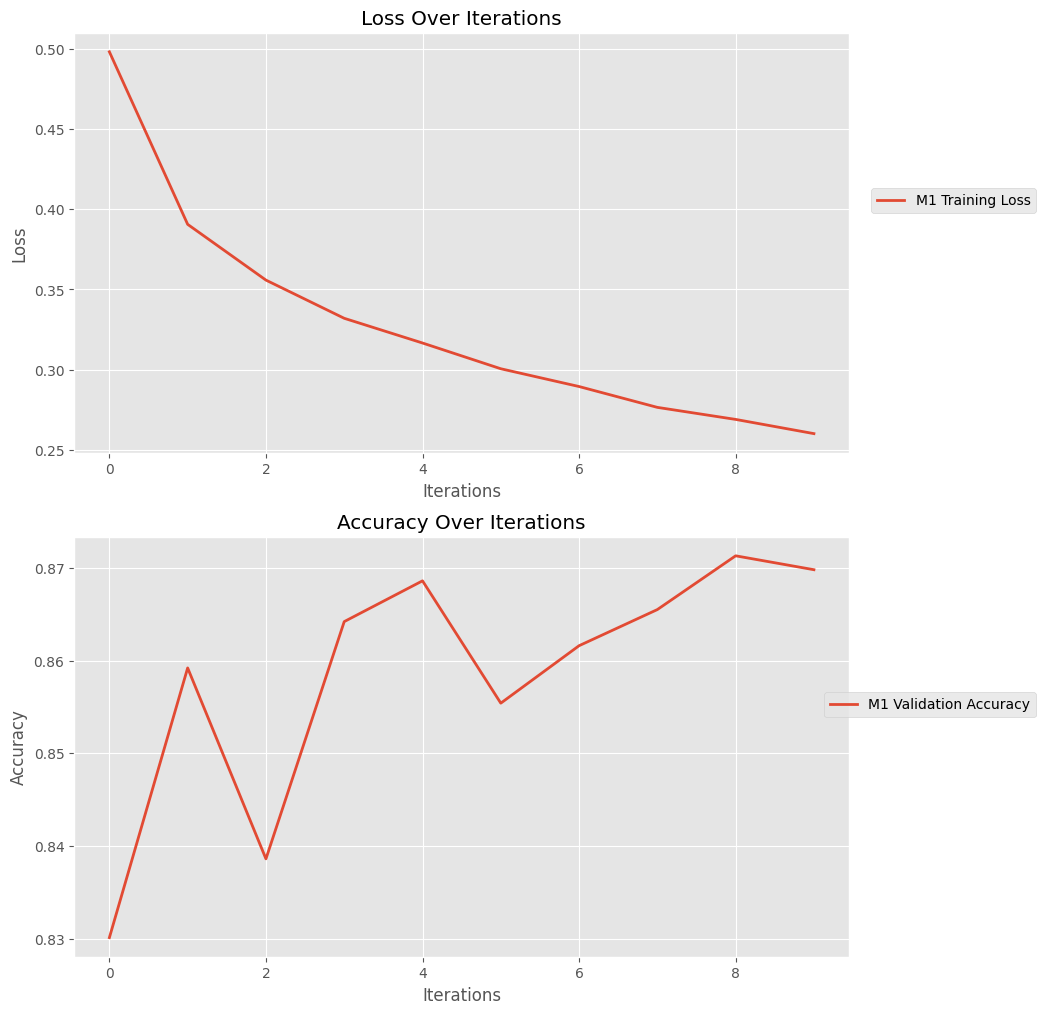

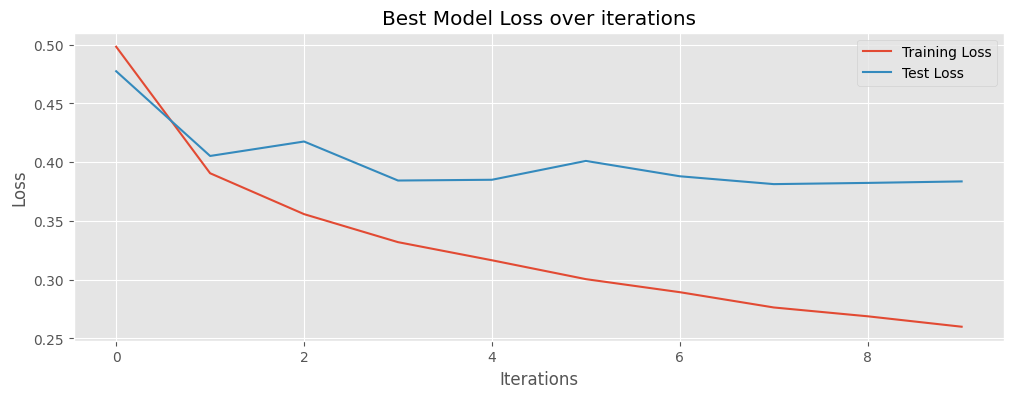

In [16]:
plot_loss_precision([best_trlh], [best_teah], save_fig=True)
plot_loss_comparation(best_trlh, best_telh, 
                      title="Best Model Loss over iterations", save_fig=True)

## Evaluación


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
def get_predictions_and_labels(model, test_loader):
    predictions, labels = [], []
    model.eval()
    for images, y_true in test_loader:
        with torch.no_grad():
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.tolist())
            labels.extend(y_true.tolist())
    return predictions, labels

def get_metrics_for_each_class(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    return accuracy, precision, recall, f1

def build_confusion_matrix(y_true, y_pred):
    # construya la matriz se refiere a que hay que calcularla a mano sin usar librerias?
    return ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

Accuracy: 0.87
Precision:
 [0.78121975 0.97777778 0.76958955 0.90869565 0.80515464 0.96064581
 0.66439024 0.95025907 0.97959184 0.92125237]
Recall:
 [0.807 0.968 0.825 0.836 0.781 0.952 0.681 0.917 0.96  0.971]
F1:
 [0.79390064 0.97286432 0.79633205 0.87083333 0.7928934  0.95630337
 0.67259259 0.93333333 0.96969697 0.94547225]


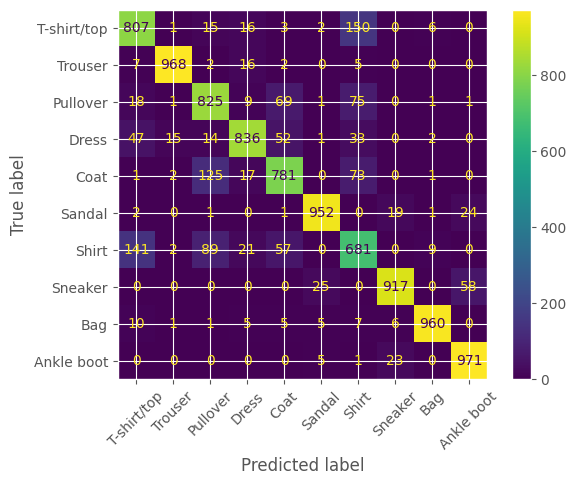

In [19]:
y_pred, y_true = get_predictions_and_labels(regularized_best_model, test_loader)

accuracy, precision, recall, f1 = get_metrics_for_each_class(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision:\n {precision}")
print(f"Recall:\n {recall}")
print(f"F1:\n {f1}")

ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
            display_labels=class_labels, xticks_rotation=45)
plt.show()

El modelo logr un 87% de accuracy, similar a los resultados obtenidos en el sitio del dataset con los modelos Clasificadores MLP o RandomForest.

Si bien no tenemos datos de la precision del resto de modelos en el sitio del dataset podemos considerar que el modelo en cuestion alcanzo resultados razonables dado que la precision en cada una de las clases ronda entre el 80% y 90%.

Observando la matriz de confusion podemos ver claramente como si bien el modelo logra un buen trabajo en general, tiene propension a confundir ciertas clases, como por ejemplo la clase 6 (Shirt) con la clase 0 (T-shirt/top) o la clase 2 (Pullover) con la clase 4 (Coat). Sin embargo, esto es algo razonable dado que dichas clases son inherentemente similares.

Otro ejemplo son Ankle Boot y Sneaker, donde el modelo confunde algunas instancias (en menor proporcion que las mencionadas anteriormente) y esto tambien es razonable dado que son tipos de calzado.

*  [ver resultados](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/)

### e) Entropía 

Muestre las diez instancias del conjunto de evaluación más “difíciles” para el clasificador
construido, utilizando como medida la entropía. Comente los resultados.

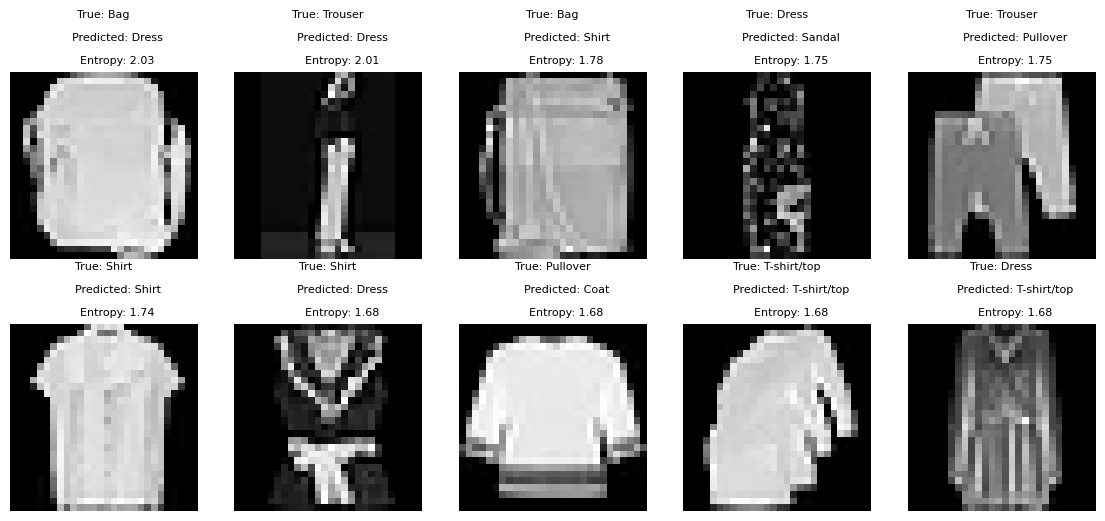

In [24]:
def entropy_from_predictions(predictions):
    prob = nn.functional.softmax(predictions, dim=1)  # Obtener las probabilidades de las predicciones
    log_prob = torch.log(prob)  # Calcular el logaritmo negativo de las probabilidades
    entropy = -torch.sum(prob * log_prob, dim=1)  # Calcular la entropía
    return entropy

def get_entropies(model, test_loader):
    entropies = []
    model.eval()
    for images, labels in test_loader:
        with torch.no_grad():
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
        entropy = entropy_from_predictions(outputs)
        entropies.append(entropy)
    # Concatenar las entropías de todas las instancias en el conjunto de evaluación
    entropies = torch.cat(entropies, dim=0)
    return entropies

entropies = get_entropies(regularized_best_model, test_loader)

# filter nan values
entropies = entropies[~torch.isnan(entropies)]

# 10 instancias más difíciles (mayor entropía)
top_difficult_instances = torch.topk(entropies, k=10, largest=True)

image_transform = transforms.ToPILImage()
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
# Imprimir las etiquetas verdaderas y las predicciones para las instancias más difíciles
for idx, ax in zip(top_difficult_instances.indices, axes.flat):
    true_label = test_dataset[idx][1]  # Obtiene la etiqueta verdadera de la instancia
    img = test_dataset[idx][0]
    with torch.no_grad():
        prediction = regularized_best_model(img.unsqueeze(0))  # Realiza una predicción
    predicted_label = torch.argmax(prediction, dim=1)
    
    image = img / 2 + 0.5  # Denormalizacion
    image = image_transform(image)
    ax.imshow(image, cmap='gray')
    
    ax.set_title(
        f"""True: {class_labels[true_label]}\n 
        Predicted: {class_labels[predicted_label.item()]}\n
        Entropy: {entropies[idx].item():.2f}""", fontsize=8)
    ax.axis('off') 
    
plt.show()

La entropia nos da una idea de la "inseguridad" del modelo al clasificar una instancia dada.

En las imagenes de arriba podemos ver que efectivamente, son instancias que dificiles de clasificar. Muchos errores coinciden con las observaciones hechas previamente al analizar la matriz de confusion, por ejemplo, la imagen 8 nos muestra un Pullover que el modelo clasifico como Coat.

Sin embargo, es prudente destacar que el hecho de que la entropia sea alta no implica que el modelo haya clasificado mal, sino que simplemente no esta seguro de su prediccion. En nuestro caso, las imagenes 6 y 7 son predicciones correctas a pesar de la alta incertidumbre del modelo.



## Conclusiones Generales

Vemos que el modelo logra un buen rendimiento con una arquitectura relativamente simple, por lo que podriamos decir que este modelo de clasificacion es una forma de abordar el problema adecuada, o al menos razonable. 
Mas aun, los resultados obtenidos son similares a los alcanzados por otros modelos propuestos. 

De todas formas, es claro que aun existen mejoras que podrian ser aplicadas para lograr un mejor rendimiento, como por ejemplo, probar con otras tecnicas de regularizacion, probar con arquitecturas mas complejas con mas capas ocultas, etc.

Sin embargo, consideramos que el modelo propuesto logra resolver el problema planteado de manera satisfactoria.

